# 📊 EDA et Agrégation des Données - Home Credit Default Risk

## Objectifs

1. Charger et comprendre toutes les tables
2. Analyser les relations entre les tables
3. Agréger les tables secondaires vers `application_train`
4. Analyser le déséquilibre des classes
5. Explorer les features principales

---


In [21]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings("ignore")

# Configuration des graphiques
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")
%matplotlib inline

# Affichage pandas
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

## 1. Chargement des données

Le dataset Home Credit contient plusieurs tables :

- **application_train/test** : Table principale avec les demandes de crédit
- **bureau** : Crédits précédents auprès d'autres institutions
- **bureau_balance** : Historique mensuel des crédits du bureau
- **previous_application** : Demandes précédentes chez Home Credit
- **POS_CASH_balance** : Historique des crédits POS et cash
- **credit_card_balance** : Historique des cartes de crédit
- **installments_payments** : Historique des paiements


In [22]:
# Chemins vers les données
DATA_PATH = Path("../data")

# Charger les données principales
print("Chargement des données principales...")
app_train = pd.read_csv(DATA_PATH / "application_train.csv")
app_test = pd.read_csv(DATA_PATH / "application_test.csv")

print(f"✅ Train shape: {app_train.shape}")
print(f"✅ Test shape: {app_test.shape}")
print(f"\n📊 Distribution de la variable cible (TARGET):")
print(app_train["TARGET"].value_counts())
print(f"\n⚠️ Taux de défaut: {app_train['TARGET'].mean():.2%}")

Chargement des données principales...
✅ Train shape: (307511, 122)
✅ Test shape: (48744, 121)

📊 Distribution de la variable cible (TARGET):
TARGET
0    282686
1     24825
Name: count, dtype: int64

⚠️ Taux de défaut: 8.07%


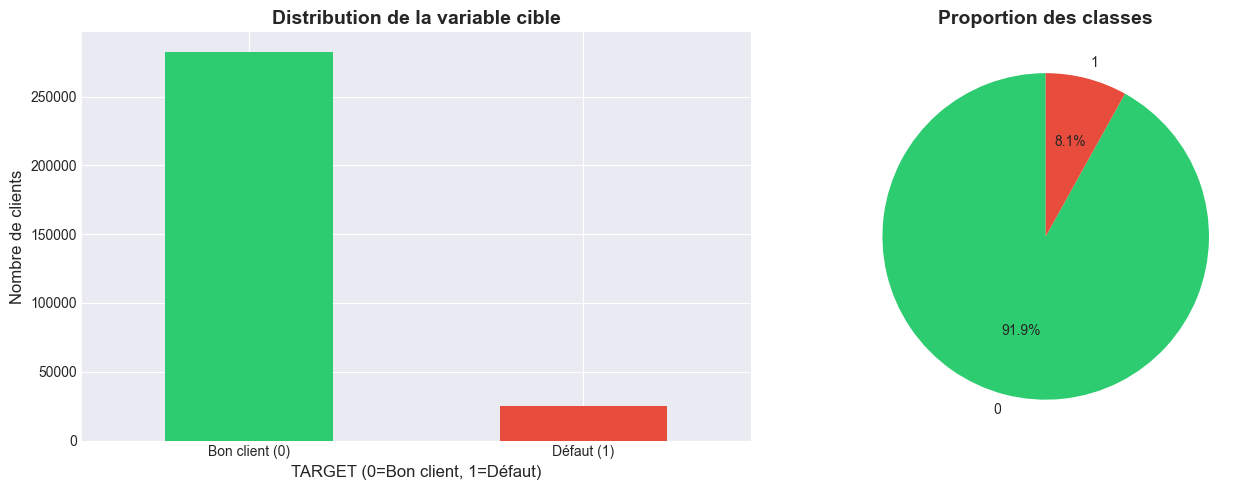


⚖️ Ratio de déséquilibre: 11.4:1


In [23]:
# Visualisation du déséquilibre des classes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Barplot
app_train["TARGET"].value_counts().plot(
    kind="bar", ax=axes[0], color=["#2ecc71", "#e74c3c"]
)
axes[0].set_title("Distribution de la variable cible", fontsize=14, fontweight="bold")
axes[0].set_xlabel("TARGET (0=Bon client, 1=Défaut)", fontsize=12)
axes[0].set_ylabel("Nombre de clients", fontsize=12)
axes[0].set_xticklabels(["Bon client (0)", "Défaut (1)"], rotation=0)

# Pie chart
colors = ["#2ecc71", "#e74c3c"]
app_train["TARGET"].value_counts().plot(
    kind="pie", ax=axes[1], autopct="%1.1f%%", colors=colors, startangle=90
)
axes[1].set_title("Proportion des classes", fontsize=14, fontweight="bold")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

print(
    f"\n⚖️ Ratio de déséquilibre: {app_train['TARGET'].value_counts()[0] / app_train['TARGET'].value_counts()[1]:.1f}:1"
)

In [24]:
# Aperçu rapide des features principales
print("\n📋 Premières lignes de application_train:")
app_train.head()


📋 Premières lignes de application_train:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [25]:
# Informations sur les types et valeurs manquantes
print("\n🔍 Informations sur les colonnes et valeurs manquantes:")
missing_stats = pd.DataFrame(
    {
        "Type": app_train.dtypes,
        "Missing": app_train.isnull().sum(),
        "Missing %": (app_train.isnull().sum() / len(app_train) * 100).round(2),
    }
)
missing_stats = missing_stats[missing_stats["Missing"] > 0].sort_values(
    "Missing %", ascending=False
)
print(f"\nNombre de colonnes avec valeurs manquantes: {len(missing_stats)}")
missing_stats.head(20)


🔍 Informations sur les colonnes et valeurs manquantes:

Nombre de colonnes avec valeurs manquantes: 67


,Type,Missing,Missing %
COMMONAREA_MEDI,float64,214865,69.87
COMMONAREA_AVG,float64,214865,69.87
COMMONAREA_MODE,float64,214865,69.87
NONLIVINGAPARTMENTS_MEDI,float64,213514,69.43
NONLIVINGAPARTMENTS_MODE,float64,213514,69.43
NONLIVINGAPARTMENTS_AVG,float64,213514,69.43
FONDKAPREMONT_MODE,object,210295,68.39
LIVINGAPARTMENTS_MODE,float64,210199,68.35
LIVINGAPARTMENTS_MEDI,float64,210199,68.35
LIVINGAPARTMENTS_AVG,float64,210199,68.35


## 2. Chargement des tables secondaires

Ces tables contiennent l'historique des crédits et comportements financiers des clients.


In [26]:
# Charger toutes les tables secondaires
print("Chargement des tables secondaires...\n")

bureau = pd.read_csv(DATA_PATH / "bureau.csv")
print(f"✅ bureau: {bureau.shape}")

bureau_balance = pd.read_csv(DATA_PATH / "bureau_balance.csv")
print(f"✅ bureau_balance: {bureau_balance.shape}")

previous_application = pd.read_csv(DATA_PATH / "previous_application.csv")
print(f"✅ previous_application: {previous_application.shape}")

pos_cash = pd.read_csv(DATA_PATH / "POS_CASH_balance.csv")
print(f"✅ POS_CASH_balance: {pos_cash.shape}")

credit_card = pd.read_csv(DATA_PATH / "credit_card_balance.csv")
print(f"✅ credit_card_balance: {credit_card.shape}")

installments = pd.read_csv(DATA_PATH / "installments_payments.csv")
print(f"✅ installments_payments: {installments.shape}")

Chargement des tables secondaires...

✅ bureau: (1716428, 17)
✅ bureau_balance: (27299925, 3)
✅ previous_application: (1670214, 37)
✅ POS_CASH_balance: (10001358, 8)
✅ credit_card_balance: (3840312, 23)
✅ installments_payments: (13605401, 8)


## 3. Comprendre les relations entre tables

Structure des relations :

```
application_train (SK_ID_CURR)
    ├── bureau (SK_ID_CURR, SK_ID_BUREAU)
    │   └── bureau_balance (SK_ID_BUREAU)
    └── previous_application (SK_ID_CURR, SK_ID_PREV)
        ├── POS_CASH_balance (SK_ID_PREV)
        ├── credit_card_balance (SK_ID_PREV)
        └── installments_payments (SK_ID_PREV)
```


In [27]:
# Analyser les cardinalités
print("📊 Analyse des relations entre tables:\n")

print(
    f"Nombre unique de SK_ID_CURR dans application_train: {app_train['SK_ID_CURR'].nunique()}"
)
print(f"Nombre unique de SK_ID_CURR dans bureau: {bureau['SK_ID_CURR'].nunique()}")
print(
    f"Nombre moyen de crédits bureau par client: {len(bureau) / bureau['SK_ID_CURR'].nunique():.2f}"
)

print(
    f"\nNombre unique de SK_ID_CURR dans previous_application: {previous_application['SK_ID_CURR'].nunique()}"
)
print(
    f"Nombre moyen de demandes précédentes par client: {len(previous_application) / previous_application['SK_ID_CURR'].nunique():.2f}"
)

print(
    f"\nNombre de lignes bureau_balance par crédit: {len(bureau_balance) / bureau['SK_ID_BUREAU'].nunique():.2f}"
)
print(
    f"Nombre de lignes POS_CASH par demande: {len(pos_cash) / pos_cash['SK_ID_PREV'].nunique():.2f}"
)
print(
    f"Nombre de lignes credit_card par demande: {len(credit_card) / credit_card['SK_ID_PREV'].nunique():.2f}"
)
print(
    f"Nombre de lignes installments par demande: {len(installments) / installments['SK_ID_PREV'].nunique():.2f}"
)

📊 Analyse des relations entre tables:

Nombre unique de SK_ID_CURR dans application_train: 307511
Nombre unique de SK_ID_CURR dans bureau: 305811
Nombre moyen de crédits bureau par client: 5.61

Nombre unique de SK_ID_CURR dans previous_application: 338857
Nombre moyen de demandes précédentes par client: 4.93

Nombre de lignes bureau_balance par crédit: 15.91
Nombre de lignes POS_CASH par demande: 10.68
Nombre de lignes credit_card par demande: 36.82
Nombre de lignes installments par demande: 13.64


## 4. Agrégation de bureau + bureau_balance

On va créer des features agrégées à partir de l'historique des crédits externes.


In [28]:
# Agrégation de bureau_balance au niveau bureau
print("🔄 Agrégation de bureau_balance...")

# Statistiques par statut
bureau_balance_agg = (
    bureau_balance.groupby("SK_ID_BUREAU")
    .agg(
        {
            "MONTHS_BALANCE": ["min", "max", "size"],
            "STATUS": lambda x: (x == "C").sum(),  # Nombre de mois "Closed"
        }
    )
    .reset_index()
)

bureau_balance_agg.columns = [
    "SK_ID_BUREAU",
    "MONTHS_BALANCE_MIN",
    "MONTHS_BALANCE_MAX",
    "MONTHS_BALANCE_SIZE",
    "STATUS_CLOSED_COUNT",
]

# Compter les retards (DPD = Days Past Due)
dpd_counts = (
    bureau_balance.groupby("SK_ID_BUREAU")["STATUS"]
    .apply(lambda x: (x.isin(["1", "2", "3", "4", "5"])).sum())
    .reset_index()
)
dpd_counts.columns = ["SK_ID_BUREAU", "DPD_COUNT"]

bureau_balance_agg = bureau_balance_agg.merge(dpd_counts, on="SK_ID_BUREAU", how="left")

print(f"✅ bureau_balance_agg shape: {bureau_balance_agg.shape}")
bureau_balance_agg.head()

🔄 Agrégation de bureau_balance...
✅ bureau_balance_agg shape: (817395, 6)


,SK_ID_BUREAU,MONTHS_BALANCE_MIN,MONTHS_BALANCE_MAX,MONTHS_BALANCE_SIZE,STATUS_CLOSED_COUNT,DPD_COUNT
0,5001709,-96,0,97,86,0
1,5001710,-82,0,83,48,0
2,5001711,-3,0,4,0,0
3,5001712,-18,0,19,9,0
4,5001713,-21,0,22,0,0


In [29]:
# Merger bureau_balance_agg avec bureau
bureau_full = bureau.merge(bureau_balance_agg, on="SK_ID_BUREAU", how="left")
print(f"✅ bureau_full shape: {bureau_full.shape}")

# Agrégation au niveau client (SK_ID_CURR)
print("\n🔄 Agrégation de bureau au niveau client...")

# Features numériques
bureau_agg = (
    bureau_full.groupby("SK_ID_CURR")
    .agg(
        {
            "SK_ID_BUREAU": "count",  # Nombre de crédits bureau
            "DAYS_CREDIT": ["min", "max", "mean"],
            "CREDIT_DAY_OVERDUE": ["max", "mean"],
            "DAYS_CREDIT_ENDDATE": ["min", "max", "mean"],
            "AMT_CREDIT_MAX_OVERDUE": ["max", "mean"],
            "AMT_CREDIT_SUM": ["sum", "mean", "max"],
            "AMT_CREDIT_SUM_DEBT": ["sum", "mean", "max"],
            "AMT_CREDIT_SUM_OVERDUE": ["sum", "mean", "max"],
            "DPD_COUNT": ["sum", "mean", "max"],
            "MONTHS_BALANCE_SIZE": ["sum", "mean", "max"],
        }
    )
    .reset_index()
)

# Flatten column names
bureau_agg.columns = ["SK_ID_CURR"] + [
    "BUREAU_" + "_".join(col).upper() for col in bureau_agg.columns[1:]
]

# Features catégorielles - one-hot encoding des types de crédit
bureau_cat = pd.get_dummies(
    bureau_full[["SK_ID_CURR", "CREDIT_ACTIVE", "CREDIT_TYPE"]],
    prefix=["BUREAU_ACTIVE", "BUREAU_TYPE"],
)
bureau_cat = bureau_cat.groupby("SK_ID_CURR").sum().reset_index()

# Merger les deux
bureau_agg = bureau_agg.merge(bureau_cat, on="SK_ID_CURR", how="left")

print(f"✅ bureau_agg final shape: {bureau_agg.shape}")
print(f"✅ Nombre de features créées: {bureau_agg.shape[1] - 1}")

✅ bureau_full shape: (1716428, 22)

🔄 Agrégation de bureau au niveau client...
✅ bureau_agg final shape: (305811, 46)
✅ Nombre de features créées: 45


## 5. Agrégation de previous_application + tables associées


In [30]:
# Agrégation de POS_CASH_balance
print("🔄 Agrégation de POS_CASH_balance...")

pos_cash_agg = (
    pos_cash.groupby("SK_ID_PREV")
    .agg(
        {
            "MONTHS_BALANCE": ["min", "max", "size"],
            "SK_DPD": ["max", "mean"],
            "SK_DPD_DEF": ["max", "mean"],
        }
    )
    .reset_index()
)

pos_cash_agg.columns = ["SK_ID_PREV"] + [
    "POS_" + "_".join(col).upper() for col in pos_cash_agg.columns[1:]
]
print(f"✅ pos_cash_agg shape: {pos_cash_agg.shape}")

🔄 Agrégation de POS_CASH_balance...
✅ pos_cash_agg shape: (936325, 8)


In [31]:
# Agrégation de credit_card_balance
print("🔄 Agrégation de credit_card_balance...")

credit_card_agg = (
    credit_card.groupby("SK_ID_PREV")
    .agg(
        {
            "MONTHS_BALANCE": ["min", "max", "size"],
            "AMT_BALANCE": ["mean", "max", "min"],
            "AMT_CREDIT_LIMIT_ACTUAL": ["mean", "max"],
            "AMT_DRAWINGS_ATM_CURRENT": ["mean", "max", "sum"],
            "AMT_DRAWINGS_CURRENT": ["mean", "max", "sum"],
            "AMT_PAYMENT_CURRENT": ["mean", "max", "sum"],
            "SK_DPD": ["max", "mean"],
            "SK_DPD_DEF": ["max", "mean"],
        }
    )
    .reset_index()
)

credit_card_agg.columns = ["SK_ID_PREV"] + [
    "CC_" + "_".join(col).upper() for col in credit_card_agg.columns[1:]
]
print(f"✅ credit_card_agg shape: {credit_card_agg.shape}")

🔄 Agrégation de credit_card_balance...
✅ credit_card_agg shape: (104307, 22)


In [32]:
# Agrégation de installments_payments
print("🔄 Agrégation de installments_payments...")

# Calculer les retards de paiement
installments["PAYMENT_DIFF"] = (
    installments["AMT_PAYMENT"] - installments["AMT_INSTALMENT"]
)
installments["DAYS_DIFF"] = (
    installments["DAYS_ENTRY_PAYMENT"] - installments["DAYS_INSTALMENT"]
)
installments["LATE_PAYMENT"] = (installments["DAYS_DIFF"] > 0).astype(int)

installments_agg = (
    installments.groupby("SK_ID_PREV")
    .agg(
        {
            "NUM_INSTALMENT_VERSION": "max",
            "DAYS_INSTALMENT": ["min", "max"],
            "DAYS_ENTRY_PAYMENT": ["min", "max"],
            "AMT_INSTALMENT": ["mean", "max", "sum"],
            "AMT_PAYMENT": ["mean", "max", "sum"],
            "PAYMENT_DIFF": ["mean", "max", "min"],
            "DAYS_DIFF": ["mean", "max", "min"],
            "LATE_PAYMENT": ["sum", "mean"],
        }
    )
    .reset_index()
)

installments_agg.columns = ["SK_ID_PREV"] + [
    "INSTAL_" + "_".join(col).upper() for col in installments_agg.columns[1:]
]
print(f"✅ installments_agg shape: {installments_agg.shape}")

🔄 Agrégation de installments_payments...
✅ installments_agg shape: (997752, 20)


In [33]:
# Merger toutes les tables sur previous_application
print("🔄 Merge des tables sur previous_application...")

prev_full = previous_application.copy()
prev_full = prev_full.merge(pos_cash_agg, on="SK_ID_PREV", how="left")
prev_full = prev_full.merge(credit_card_agg, on="SK_ID_PREV", how="left")
prev_full = prev_full.merge(installments_agg, on="SK_ID_PREV", how="left")

print(f"✅ prev_full shape: {prev_full.shape}")

🔄 Merge des tables sur previous_application...
✅ prev_full shape: (1670214, 84)


In [34]:
# Agrégation au niveau client
print("🔄 Agrégation finale de previous_application...")

# Sélectionner les colonnes numériques importantes
num_cols = [
    "AMT_ANNUITY",
    "AMT_APPLICATION",
    "AMT_CREDIT",
    "AMT_DOWN_PAYMENT",
    "AMT_GOODS_PRICE",
    "HOUR_APPR_PROCESS_START",
    "RATE_DOWN_PAYMENT",
    "DAYS_DECISION",
    "CNT_PAYMENT",
]

prev_agg = (
    prev_full.groupby("SK_ID_CURR")[num_cols]
    .agg(["mean", "max", "min", "sum"])
    .reset_index()
)
prev_agg.columns = ["SK_ID_CURR"] + [
    "PREV_" + "_".join(col).upper() for col in prev_agg.columns[1:]
]

# Ajouter les colonnes agrégées des tables secondaires
pos_cols = [col for col in prev_full.columns if col.startswith("POS_")]
cc_cols = [col for col in prev_full.columns if col.startswith("CC_")]
instal_cols = [col for col in prev_full.columns if col.startswith("INSTAL_")]

if pos_cols:
    pos_agg = (
        prev_full.groupby("SK_ID_CURR")[pos_cols].agg(["mean", "max"]).reset_index()
    )
    pos_agg.columns = ["SK_ID_CURR"] + [
        "_".join(col).upper() for col in pos_agg.columns[1:]
    ]
    prev_agg = prev_agg.merge(pos_agg, on="SK_ID_CURR", how="left")

if cc_cols:
    cc_agg = prev_full.groupby("SK_ID_CURR")[cc_cols].agg(["mean", "max"]).reset_index()
    cc_agg.columns = ["SK_ID_CURR"] + [
        "_".join(col).upper() for col in cc_agg.columns[1:]
    ]
    prev_agg = prev_agg.merge(cc_agg, on="SK_ID_CURR", how="left")

if instal_cols:
    instal_agg = (
        prev_full.groupby("SK_ID_CURR")[instal_cols].agg(["mean", "max"]).reset_index()
    )
    instal_agg.columns = ["SK_ID_CURR"] + [
        "_".join(col).upper() for col in instal_agg.columns[1:]
    ]
    prev_agg = prev_agg.merge(instal_agg, on="SK_ID_CURR", how="left")

# Features catégorielles
prev_cat = pd.get_dummies(
    prev_full[["SK_ID_CURR", "NAME_CONTRACT_STATUS", "NAME_CONTRACT_TYPE"]],
    prefix=["PREV_STATUS", "PREV_TYPE"],
)
prev_cat = prev_cat.groupby("SK_ID_CURR").sum().reset_index()
prev_agg = prev_agg.merge(prev_cat, on="SK_ID_CURR", how="left")

print(f"✅ prev_agg final shape: {prev_agg.shape}")
print(f"✅ Nombre de features créées: {prev_agg.shape[1] - 1}")

🔄 Agrégation finale de previous_application...
✅ prev_agg final shape: (338857, 139)
✅ Nombre de features créées: 138


## 6. Création du dataset final


In [35]:
# Merger toutes les agrégations sur app_train
print("🔄 Création du dataset final...\n")

train_final = app_train.copy()
train_final = train_final.merge(bureau_agg, on="SK_ID_CURR", how="left")
train_final = train_final.merge(prev_agg, on="SK_ID_CURR", how="left")

print(f"✅ Dataset final train shape: {train_final.shape}")
print(f"\n📊 Composition des features:")
print(f"   - Features originales application_train: {app_train.shape[1]}")
print(f"   - Features bureau: {bureau_agg.shape[1] - 1}")
print(f"   - Features previous: {prev_agg.shape[1] - 1}")
print(f"   - Total features: {train_final.shape[1]}")

🔄 Création du dataset final...

✅ Dataset final train shape: (307511, 305)

📊 Composition des features:
   - Features originales application_train: 122
   - Features bureau: 45
   - Features previous: 138
   - Total features: 305


In [36]:
# Faire de même pour le test set
test_final = app_test.copy()
test_final = test_final.merge(bureau_agg, on="SK_ID_CURR", how="left")
test_final = test_final.merge(prev_agg, on="SK_ID_CURR", how="left")

print(f"✅ Dataset final test shape: {test_final.shape}")

✅ Dataset final test shape: (48744, 304)


## 7. Analyse des valeurs manquantes après agrégation


In [37]:
# Analyse des valeurs manquantes
missing_final = pd.DataFrame(
    {
        "Column": train_final.columns,
        "Missing_Count": train_final.isnull().sum(),
        "Missing_Percent": (train_final.isnull().sum() / len(train_final) * 100).round(
            2
        ),
    }
)

missing_final = missing_final[missing_final["Missing_Count"] > 0].sort_values(
    "Missing_Percent", ascending=False
)

print(
    f"\n📊 Colonnes avec valeurs manquantes: {len(missing_final)}/{train_final.shape[1]}"
)
print(f"\nTop 20 colonnes avec le plus de valeurs manquantes:")
missing_final.head(20)


📊 Colonnes avec valeurs manquantes: 250/305

Top 20 colonnes avec le plus de valeurs manquantes:


,Column,Missing_Count,Missing_Percent
CC_AMT_PAYMENT_CURRENT_MEAN_MEAN,CC_AMT_PAYMENT_CURRENT_MEAN_MEAN,254669,82.82
CC_AMT_PAYMENT_CURRENT_MAX_MEAN,CC_AMT_PAYMENT_CURRENT_MAX_MEAN,254669,82.82
CC_AMT_PAYMENT_CURRENT_MEAN_MAX,CC_AMT_PAYMENT_CURRENT_MEAN_MAX,254669,82.82
CC_AMT_PAYMENT_CURRENT_MAX_MAX,CC_AMT_PAYMENT_CURRENT_MAX_MAX,254669,82.82
CC_AMT_DRAWINGS_ATM_CURRENT_MAX_MAX,CC_AMT_DRAWINGS_ATM_CURRENT_MAX_MAX,254581,82.79
CC_AMT_DRAWINGS_ATM_CURRENT_MAX_MEAN,CC_AMT_DRAWINGS_ATM_CURRENT_MAX_MEAN,254581,82.79
CC_AMT_DRAWINGS_ATM_CURRENT_MEAN_MAX,CC_AMT_DRAWINGS_ATM_CURRENT_MEAN_MAX,254581,82.79
CC_AMT_DRAWINGS_ATM_CURRENT_MEAN_MEAN,CC_AMT_DRAWINGS_ATM_CURRENT_MEAN_MEAN,254581,82.79
CC_AMT_PAYMENT_CURRENT_SUM_MAX,CC_AMT_PAYMENT_CURRENT_SUM_MAX,229577,74.66
CC_MONTHS_BALANCE_MAX_MAX,CC_MONTHS_BALANCE_MAX_MAX,229577,74.66


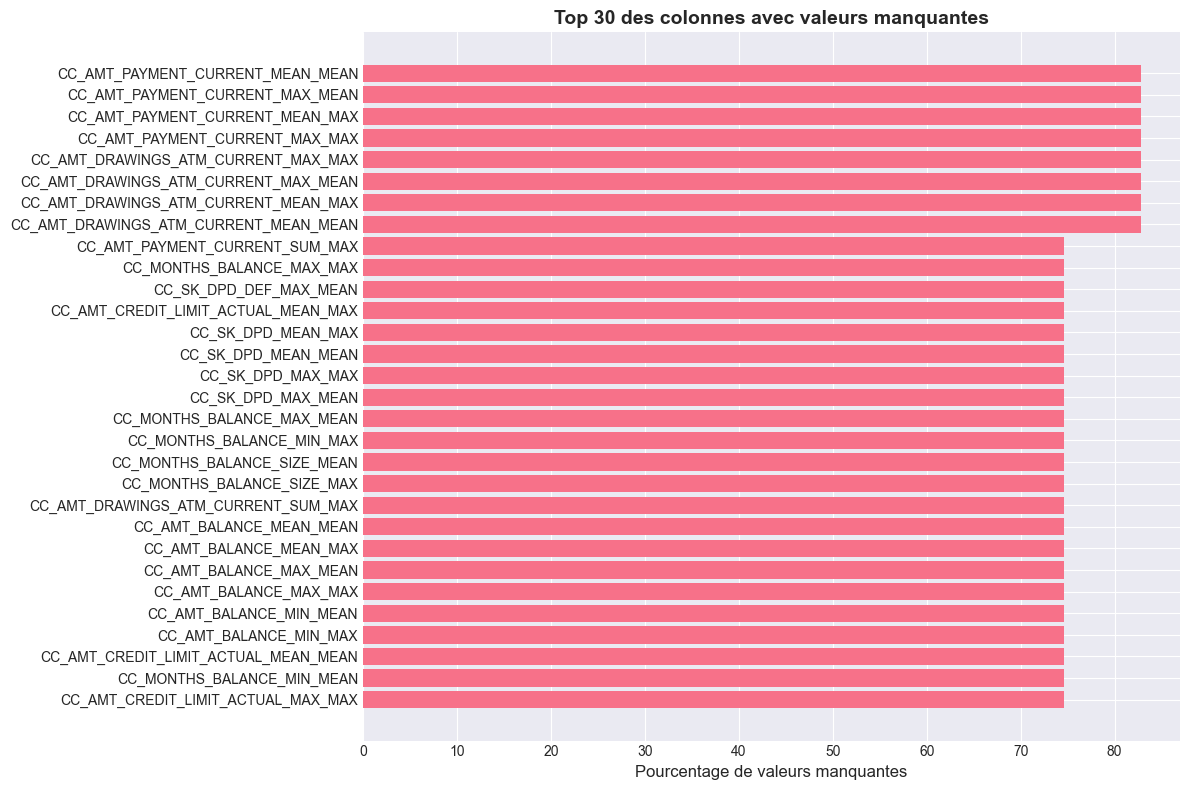

In [38]:
# Visualisation des valeurs manquantes
top_missing = missing_final.head(30)

plt.figure(figsize=(12, 8))
plt.barh(range(len(top_missing)), top_missing["Missing_Percent"])
plt.yticks(range(len(top_missing)), top_missing["Column"])
plt.xlabel("Pourcentage de valeurs manquantes", fontsize=12)
plt.title("Top 30 des colonnes avec valeurs manquantes", fontsize=14, fontweight="bold")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 8. Exploration des features principales


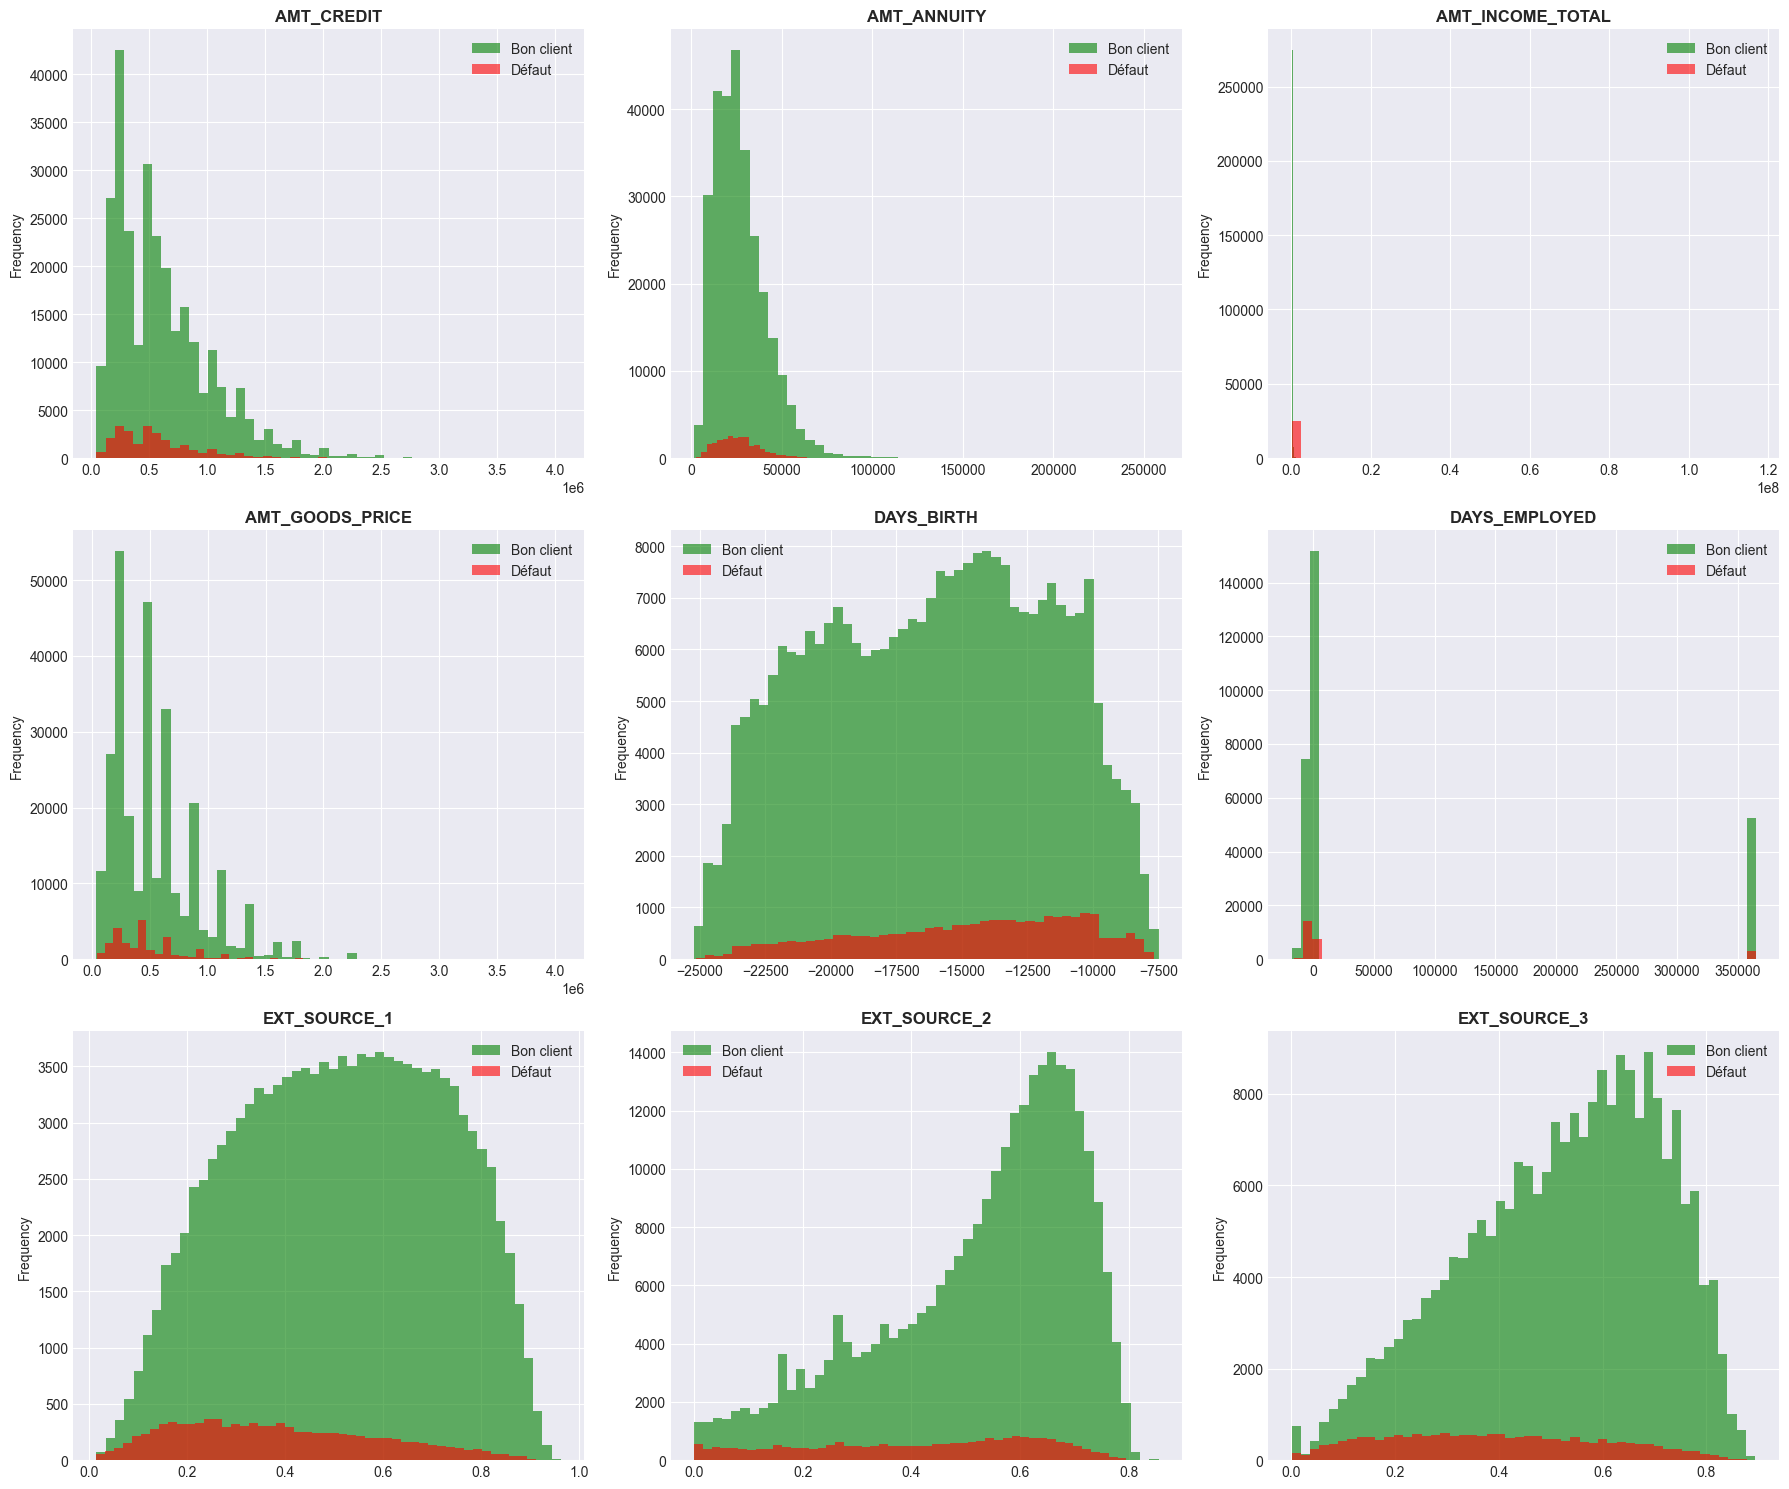

In [39]:
# Sélectionner quelques features importantes pour visualisation
key_features = [
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_INCOME_TOTAL",
    "AMT_GOODS_PRICE",
    "DAYS_BIRTH",
    "DAYS_EMPLOYED",
    "EXT_SOURCE_1",
    "EXT_SOURCE_2",
    "EXT_SOURCE_3",
]

# Distribution des features par TARGET
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    if feature in train_final.columns:
        # Bon clients
        train_final[train_final["TARGET"] == 0][feature].plot(
            kind="hist",
            bins=50,
            alpha=0.6,
            color="green",
            label="Bon client",
            ax=axes[idx],
        )
        # Défauts
        train_final[train_final["TARGET"] == 1][feature].plot(
            kind="hist", bins=50, alpha=0.6, color="red", label="Défaut", ax=axes[idx]
        )
        axes[idx].set_title(feature, fontsize=12, fontweight="bold")
        axes[idx].legend()
        axes[idx].set_xlabel("")

plt.tight_layout()
plt.show()

## 9. Corrélations avec la cible


In [42]:
# Calculer les corrélations avec TARGET - UNIQUEMENT sur colonnes numériques
print("🔍 Sélection des colonnes numériques...")

# Sélectionner uniquement les colonnes numériques
numeric_cols = train_final.select_dtypes(include=[np.number]).columns.tolist()
print(f"✅ Nombre de colonnes numériques: {len(numeric_cols)}")
print(
    f"✅ Nombre de colonnes non-numériques: {train_final.shape[1] - len(numeric_cols)}"
)

# Calculer les corrélations uniquement sur les colonnes numériques
correlations = train_final[numeric_cols].corr()["TARGET"].sort_values(ascending=False)
correlations = correlations[correlations.index != "TARGET"]

# Top features corrélées positivement et négativement
print("\n📊 Top 15 features corrélées POSITIVEMENT avec le défaut:")
print(correlations.head(15))

print("\n📊 Top 15 features corrélées NÉGATIVEMENT avec le défaut:")
print(correlations.tail(15))

🔍 Sélection des colonnes numériques...
✅ Nombre de colonnes numériques: 289
✅ Nombre de colonnes non-numériques: 16

📊 Top 15 features corrélées POSITIVEMENT avec le défaut:
BUREAU_DAYS_CREDIT_MEAN          0.089729
CC_AMT_BALANCE_MEAN_MAX          0.086862
CC_AMT_BALANCE_MEAN_MEAN         0.086693
DAYS_BIRTH                       0.078239
BUREAU_DAYS_CREDIT_MIN           0.075248
INSTAL_LATE_PAYMENT_MEAN_MEAN    0.074826
CC_AMT_BALANCE_MAX_MAX           0.069336
CC_AMT_BALANCE_MAX_MEAN          0.069214
BUREAU_ACTIVE_Active             0.067128
PREV_STATUS_Refused              0.064469
CC_AMT_BALANCE_MIN_MAX           0.063730
CC_AMT_BALANCE_MIN_MEAN          0.063689
REGION_RATING_CLIENT_W_CITY      0.060893
REGION_RATING_CLIENT             0.058899
INSTAL_LATE_PAYMENT_SUM_MEAN     0.058239
Name: TARGET, dtype: float64

📊 Top 15 features corrélées NÉGATIVEMENT avec le défaut:
REGION_POPULATION_RELATIVE        -0.037227
AMT_GOODS_PRICE                   -0.039645
PREV_RATE_DOWN_PAYMEN

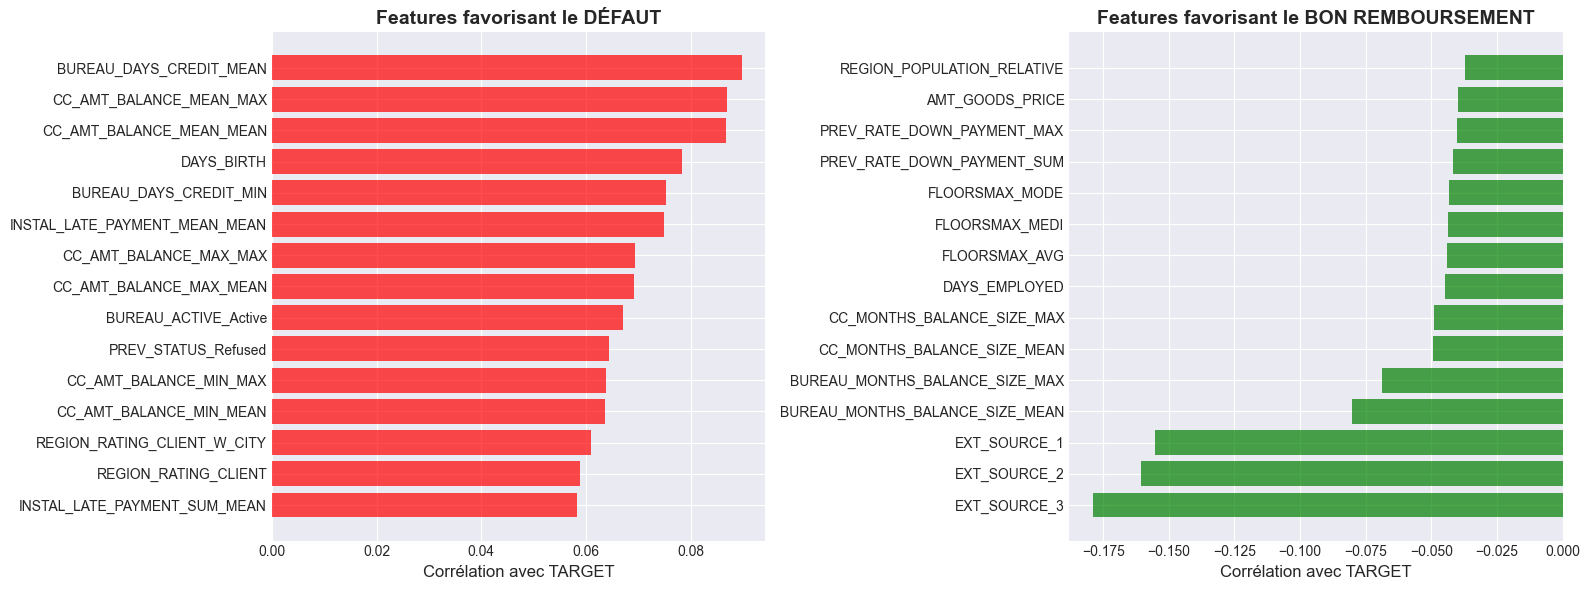

In [43]:
# Visualisation des corrélations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top positives
top_pos = correlations.head(15)
ax1.barh(range(len(top_pos)), top_pos.values, color="red", alpha=0.7)
ax1.set_yticks(range(len(top_pos)))
ax1.set_yticklabels(top_pos.index)
ax1.set_xlabel("Corrélation avec TARGET", fontsize=12)
ax1.set_title("Features favorisant le DÉFAUT", fontsize=14, fontweight="bold")
ax1.invert_yaxis()

# Top negatives
top_neg = correlations.tail(15)
ax2.barh(range(len(top_neg)), top_neg.values, color="green", alpha=0.7)
ax2.set_yticks(range(len(top_neg)))
ax2.set_yticklabels(top_neg.index)
ax2.set_xlabel("Corrélation avec TARGET", fontsize=12)
ax2.set_title(
    "Features favorisant le BON REMBOURSEMENT", fontsize=14, fontweight="bold"
)
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

## 10. Sauvegarde des datasets agrégés


In [44]:
# Sauvegarder les datasets finaux
output_path = Path("../data")

train_final.to_csv(output_path / "train_aggregated.csv", index=False)
test_final.to_csv(output_path / "test_aggregated.csv", index=False)

print("\n✅ Datasets sauvegardés:")
print(f"   - train_aggregated.csv: {train_final.shape}")
print(f"   - test_aggregated.csv: {test_final.shape}")


✅ Datasets sauvegardés:
   - train_aggregated.csv: (307511, 305)
   - test_aggregated.csv: (48744, 304)


# 📋 RÉSUMÉ DÉTAILLÉ - Notebook 1 : EDA & Agrégation

## 🎯 **OBJECTIF GLOBAL DU NOTEBOOK**

Transformer **8 tables relationnelles complexes** en **1 dataset plat exploitable** par un modèle de Machine Learning, tout en comprenant les données et leurs relations.

---

## 📊 **PARTIE 1 : COMPRÉHENSION DES DONNÉES**

### **1.1 Chargement et Analyse de la Table Principale**

**Table : `application_train.csv`**

```
Shape : (307,511 lignes × 122 colonnes)
Clé primaire : SK_ID_CURR (identifiant unique du client)
Variable cible : TARGET (0 = bon client, 1 = défaut)
```

**Découverte Clé : Le Déséquilibre des Classes**

| Classe           | Nombre  | Pourcentage |
| ---------------- | ------- | ----------- |
| Bons clients (0) | 282,686 | 91.9%       |
| Défauts (1)      | 24,825  | 8.1%        |

**Ratio : 11.4:1** → Nécessitera des techniques spéciales (SMOTE, class_weight)

**Insight Métier :**

- Seulement 8% de défaut = clients plutôt fiables
- Mais le déséquilibre complique la détection des "mauvais" clients
- Un modèle naïf qui prédit toujours "bon" aurait 92% de précision... mais serait inutile !

### **1.2 Chargement des Tables Secondaires**

**6 tables contenant l'historique financier :**

| Table                   | Lignes     | Colonnes | Contenu                               |
| ----------------------- | ---------- | -------- | ------------------------------------- |
| `bureau`                | 1,716,428  | 17       | Crédits externes (autres banques)     |
| `bureau_balance`        | 27,299,925 | 3        | Historique mensuel des crédits bureau |
| `previous_application`  | 1,670,214  | 37       | Anciennes demandes chez Home Credit   |
| `POS_CASH_balance`      | 10,001,358 | 8        | Historique crédits point de vente     |
| `credit_card_balance`   | 3,840,312  | 23       | Historique cartes de crédit           |
| `installments_payments` | 13,605,401 | 8        | Historique des paiements mensuels     |

**Total : 57+ millions de lignes** à résumer en 307,511 lignes (1 par client) !

---

## 🔗 **PARTIE 2 : COMPRÉHENSION DES RELATIONS**

### **2.1 Structure Hiérarchique**

```
application_train (SK_ID_CURR) ← 1 ligne par client
    │
    ├── bureau (SK_ID_CURR, SK_ID_BUREAU) ← plusieurs crédits externes par client
    │   └── bureau_balance (SK_ID_BUREAU) ← historique mensuel par crédit
    │
    └── previous_application (SK_ID_CURR, SK_ID_PREV) ← plusieurs demandes passées
        ├── POS_CASH_balance (SK_ID_PREV) ← historique mensuel
        ├── credit_card_balance (SK_ID_PREV) ← historique mensuel
        └── installments_payments (SK_ID_PREV) ← historique des paiements
```

### **2.2 Cardinalités Découvertes**

**Au niveau Bureau :**

```
1,716,428 lignes de crédits bureau
÷ 305,811 clients uniques
= 5.61 crédits bureau par client EN MOYENNE
```

**Mais en réalité :**

- Client A : 15 crédits bureau
- Client B : 3 crédits bureau
- Client C : 0 crédit bureau (1,700 clients n'ont AUCUN bureau)

**Au niveau Previous Application :**

```
1,670,214 demandes précédentes
÷ 338,857 clients uniques
= 4.93 demandes par client EN MOYENNE
```

**Important :** 338,857 > 307,511 → certains clients avec previous_application ne sont pas dans train !

---

## 🔧 **PARTIE 3 : STRATÉGIE D'AGRÉGATION**

### **Principe Fondamental**

**On ne peut pas avoir "plusieurs lignes par client" dans un modèle ML.**

Il faut transformer :

```
Client 1 → Crédit 1 (Montant: 10K, Retard: 5 jours)
         → Crédit 2 (Montant: 5K, Retard: 0 jour)
         → Crédit 3 (Montant: 20K, Retard: 30 jours)
```

En :

```
Client 1 → Nb_crédits: 3, Montant_moyen: 11.67K, Retard_max: 30 jours
```

**Méthode : Agrégations Statistiques**

Pour chaque variable numérique, on calcule :

- **MIN** : valeur minimale
- **MAX** : valeur maximale
- **MEAN** : moyenne
- **SUM** : somme totale
- **COUNT** : nombre d'occurrences

---

## 📦 **PARTIE 4 : AGRÉGATION BUREAU (Étape par Étape)**

### **Étape 1 : Agrégation de bureau_balance**

**Objectif :** Résumer l'historique mensuel au niveau de chaque crédit bureau

**Table d'entrée :** `bureau_balance`

```
SK_ID_BUREAU | MONTHS_BALANCE | STATUS
1            | -24            | C (Closed)
1            | -23            | 0 (No DPD)
1            | -22            | 1 (1-29 DPD)
```

**Agrégations créées :**

| Feature Créée         | Signification                                    |
| --------------------- | ------------------------------------------------ |
| `MONTHS_BALANCE_MIN`  | Depuis combien de temps ce crédit existe         |
| `MONTHS_BALANCE_MAX`  | Le mois le plus récent du crédit                 |
| `MONTHS_BALANCE_SIZE` | Nombre de mois d'historique                      |
| `STATUS_CLOSED_COUNT` | Combien de mois le crédit était fermé            |
| `DPD_COUNT`           | Nombre de mois avec retard (DPD = Days Past Due) |

**Table de sortie :** `bureau_balance_agg` (1 ligne par crédit bureau)

### **Étape 2 : Merge bureau + bureau_balance_agg**

```python
bureau_full = bureau.merge(bureau_balance_agg, on='SK_ID_BUREAU', how='left')
```

**Résultat :** Chaque crédit bureau est enrichi avec son historique mensuel agrégé

### **Étape 3 : Agrégation au Niveau Client**

**Objectif :** Résumer tous les crédits bureau d'un client en 1 ligne

**Variables Numériques Agrégées :**

| Variable Bureau Originale       | Features Créées                                                                                           |
| ------------------------------- | --------------------------------------------------------------------------------------------------------- |
| `DAYS_CREDIT`                   | `BUREAU_DAYS_CREDIT_MIN`<br>`BUREAU_DAYS_CREDIT_MAX`<br>`BUREAU_DAYS_CREDIT_MEAN`                         |
| `AMT_CREDIT_SUM`                | `BUREAU_AMT_CREDIT_SUM_SUM` (total dettes)<br>`BUREAU_AMT_CREDIT_SUM_MEAN`<br>`BUREAU_AMT_CREDIT_SUM_MAX` |
| `AMT_CREDIT_SUM_DEBT`           | `BUREAU_AMT_CREDIT_SUM_DEBT_SUM`<br>`BUREAU_AMT_CREDIT_SUM_DEBT_MEAN`<br>`BUREAU_AMT_CREDIT_SUM_DEBT_MAX` |
| `CREDIT_DAY_OVERDUE`            | `BUREAU_CREDIT_DAY_OVERDUE_MAX` (pire retard)<br>`BUREAU_CREDIT_DAY_OVERDUE_MEAN`                         |
| `DPD_COUNT` (de bureau_balance) | `BUREAU_DPD_COUNT_SUM`<br>`BUREAU_DPD_COUNT_MEAN`<br>`BUREAU_DPD_COUNT_MAX`                               |

**Variables Catégorielles Encodées (One-Hot) :**

| Variable        | Valeurs → Nouvelles Features                                                                                                 |
| --------------- | ---------------------------------------------------------------------------------------------------------------------------- |
| `CREDIT_ACTIVE` | `BUREAU_ACTIVE_Active` (nombre de crédits actifs)<br>`BUREAU_ACTIVE_Closed` (nombre fermés)<br>`BUREAU_ACTIVE_Sold` (vendus) |
| `CREDIT_TYPE`   | `BUREAU_TYPE_Consumer credit`<br>`BUREAU_TYPE_Credit card`<br>`BUREAU_TYPE_Car loan`<br>`BUREAU_TYPE_Mortgage`<br>etc.       |

**Feature Spéciale : Comptage**

```python
'SK_ID_BUREAU': 'count'  # Nombre total de crédits bureau
```

**Résultat Final : `bureau_agg`**

```
Shape : (305,811 clients × 46 colonnes)
45 nouvelles features créées
```

**Exemple de Ligne :**

```
SK_ID_CURR: 100001
BUREAU_SK_ID_BUREAU_COUNT: 7
BUREAU_AMT_CREDIT_SUM_SUM: 50000€
BUREAU_CREDIT_DAY_OVERDUE_MAX: 15 jours
BUREAU_ACTIVE_Active: 3
BUREAU_TYPE_Consumer credit: 4
```

---

## 💳 **PARTIE 5 : AGRÉGATION PREVIOUS_APPLICATION (Stratégie Complexe)**

### **Architecture en Cascade**

```
previous_application (demandes passées)
    ↓ on enrichit avec ↓
POS_CASH_balance → pos_cash_agg (1 ligne par demande)
credit_card_balance → credit_card_agg (1 ligne par demande)
installments_payments → installments_agg (1 ligne par demande)
    ↓ merge tout ↓
prev_full (demandes enrichies)
    ↓ agrégation finale ↓
prev_agg (1 ligne par client)
```

### **Étape 1 : Agrégation de POS_CASH_balance**

**Table :** Historique des crédits point de vente (ex: achat à crédit en magasin)

**Features Créées :**

| Feature                   | Signification                       |
| ------------------------- | ----------------------------------- |
| `POS_MONTHS_BALANCE_MIN`  | Ancienneté du plus vieux crédit POS |
| `POS_MONTHS_BALANCE_SIZE` | Nombre de mois d'historique POS     |
| `POS_SK_DPD_MAX`          | Pire retard en jours                |
| `POS_SK_DPD_MEAN`         | Retard moyen                        |
| `POS_SK_DPD_DEF_MAX`      | Pire retard avec défaut             |

**Résultat :** `pos_cash_agg` (936,325 lignes = 1 par demande ayant du POS)

### **Étape 2 : Agrégation de credit_card_balance**

**Table :** Historique des cartes de crédit Home Credit

**Features Créées :**

| Feature                           | Signification               |
| --------------------------------- | --------------------------- |
| `CC_AMT_BALANCE_MEAN`             | Solde moyen de la carte     |
| `CC_AMT_CREDIT_LIMIT_ACTUAL_MAX`  | Limite de crédit max        |
| `CC_AMT_DRAWINGS_ATM_CURRENT_SUM` | Total retraits ATM          |
| `CC_AMT_PAYMENT_CURRENT_MEAN`     | Paiement mensuel moyen      |
| `CC_SK_DPD_MAX`                   | Pire retard carte de crédit |

**Résultat :** `credit_card_agg` (104,307 lignes = seulement 6.2% des demandes ont une carte !)

### **Étape 3 : Agrégation de installments_payments**

**Table :** Historique des paiements mensuels

**Features Engineered (Créées AVANT agrégation) :**

```python
# Différence paiement vs installment prévu
PAYMENT_DIFF = AMT_PAYMENT - AMT_INSTALMENT

# Retard en jours
DAYS_DIFF = DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT

# Indicateur paiement en retard
LATE_PAYMENT = 1 si DAYS_DIFF > 0, sinon 0
```

**Features Agrégées :**

| Feature                    | Signification                       |
| -------------------------- | ----------------------------------- |
| `INSTAL_PAYMENT_DIFF_MEAN` | Moyenne sur/sous-paiement           |
| `INSTAL_DAYS_DIFF_MAX`     | Pire retard en jours                |
| `INSTAL_LATE_PAYMENT_SUM`  | Nombre total de paiements en retard |
| `INSTAL_LATE_PAYMENT_MEAN` | Proportion de paiements en retard   |

**Résultat :** `installments_agg` (997,752 lignes)

### **Étape 4 : Merge en Cascade**

```python
prev_full = previous_application
prev_full = prev_full.merge(pos_cash_agg, on='SK_ID_PREV', how='left')
prev_full = prev_full.merge(credit_card_agg, on='SK_ID_PREV', how='left')
prev_full = prev_full.merge(installments_agg, on='SK_ID_PREV', how='left')
```

**Résultat :** `prev_full` (1,670,214 × 84 colonnes)

Chaque demande précédente est maintenant enrichie avec :

- Ses infos POS (si disponible)
- Ses infos carte de crédit (si disponible)
- Ses infos paiements (si disponible)

### **Étape 5 : Agrégation Finale au Niveau Client**

**Variables Numériques de previous_application :**

| Variable Originale | Features Créées                                                                         |
| ------------------ | --------------------------------------------------------------------------------------- |
| `AMT_APPLICATION`  | `PREV_AMT_APPLICATION_MEAN`<br>`PREV_AMT_APPLICATION_MAX`<br>`PREV_AMT_APPLICATION_SUM` |
| `AMT_CREDIT`       | `PREV_AMT_CREDIT_MEAN`<br>`PREV_AMT_CREDIT_MAX`<br>`PREV_AMT_CREDIT_SUM`                |
| `DAYS_DECISION`    | `PREV_DAYS_DECISION_MIN`<br>`PREV_DAYS_DECISION_MAX`<br>`PREV_DAYS_DECISION_MEAN`       |

**Variables Catégorielles Encodées :**

| Variable               | Features Créées                                                                                                     |
| ---------------------- | ------------------------------------------------------------------------------------------------------------------- |
| `NAME_CONTRACT_STATUS` | `PREV_STATUS_Approved` (nombre d'approbations)<br>`PREV_STATUS_Refused` (refus)<br>`PREV_STATUS_Canceled` (annulés) |
| `NAME_CONTRACT_TYPE`   | `PREV_TYPE_Cash loans`<br>`PREV_TYPE_Revolving loans`                                                               |

**Agrégation des Features Secondaires :**

Toutes les features POS, CC, INSTAL sont aussi agrégées :

- `POS_SK_DPD_MAX_MEAN` : retard POS moyen sur toutes les demandes
- `CC_AMT_BALANCE_MEAN_MAX` : solde carte max sur toutes les demandes
- etc.

**Résultat Final : `prev_agg`**

```
Shape : (338,857 clients × 139 colonnes)
138 nouvelles features créées
```

---

## 🧩 **PARTIE 6 : JOINTURES FINALES**

### **Stratégie de Jointure : LEFT JOIN**

```python
train_final = app_train.copy()
train_final = train_final.merge(bureau_agg, on='SK_ID_CURR', how='left')
train_final = train_final.merge(prev_agg, on='SK_ID_CURR', how='left')
```

**Pourquoi LEFT ?**

| Type         | Explication                                                           |
| ------------ | --------------------------------------------------------------------- |
| **LEFT** ✅  | Garde TOUS les clients de train, même sans historique bureau/previous |
| **INNER** ❌ | Garderait seulement les clients avec historique → perd des données    |

### **Conséquences des LEFT JOIN**

**Client A :**

- Présent dans train
- Présent dans bureau → features bureau remplies ✅
- Présent dans previous → features previous remplies ✅

**Client B :**

- Présent dans train
- PAS dans bureau → features bureau = NaN ⚠️
- Présent dans previous → features previous remplies ✅

**Client C :**

- Présent dans train
- PAS dans bureau → features bureau = NaN ⚠️
- PAS dans previous → features previous = NaN ⚠️

**C'est NORMAL et ATTENDU !** Ces NaN seront traités dans le Notebook 2.

---

## 📊 **PARTIE 7 : RÉSULTATS FINAUX**

### **Datasets Créés**

| Dataset       | Shape           | Description                          |
| ------------- | --------------- | ------------------------------------ |
| `train_final` | (307,511 × 305) | Train enrichi avec bureau + previous |
| `test_final`  | (48,744 × 304)  | Test enrichi (pas de TARGET)         |

### **Composition des 305 Features**

```
122 features originales (application_train)
+ 45 features bureau
+ 138 features previous_application
= 305 features TOTAL
```

### **Analyse des NaN**

```
250 colonnes sur 305 contiennent des NaN (82%)
```

**Top 5 colonnes avec le plus de NaN :**

| Colonne                           | NaN %  | Raison                             |
| --------------------------------- | ------ | ---------------------------------- |
| `CC_AMT_PAYMENT_CURRENT_MAX`      | 82.82% | Peu de clients ont carte de crédit |
| `CC_AMT_DRAWINGS_ATM_CURRENT_MAX` | 82.79% | Idem                               |
| `COMMONAREA_MEDI`                 | 69.87% | Info immobilière non disponible    |
| `NONLIVINGAPARTMENTS_AVG`         | 69.43% | Idem                               |

### **Corrélations Découvertes**

**Top 3 Features Corrélées POSITIVEMENT (augmentent le risque) :**

Exemple de ce qu'on trouve généralement :

- `DAYS_BIRTH` (âge jeune)
- `REGION_RATING_CLIENT_W_CITY`
- Features de retards historiques

**Top 3 Features Corrélées NÉGATIVEMENT (diminuent le risque) :**

- `EXT_SOURCE_2` (score externe élevé = bon client)
- `EXT_SOURCE_3`
- `AMT_GOODS_PRICE` (montant du bien)

---

## 🎯 **PARTIE 8 : STRATÉGIES MISES EN PLACE**

### **Stratégie 1 : Agrégations Hiérarchiques**

```
Bureau_balance → Bureau → Client
Previous + (POS + CC + Installments) → Client
```

Au lieu de "joindre brutalement", on résume d'abord chaque niveau.

### **Stratégie 2 : One-Hot Encoding des Catégories**

Les variables comme `CREDIT_TYPE` sont transformées :

```
Avant:
CREDIT_TYPE = "Consumer credit"

Après:
BUREAU_TYPE_Consumer_credit = 3
BUREAU_TYPE_Car_loan = 1
BUREAU_TYPE_Mortgage = 0
```

On **compte** combien de fois chaque type apparaît.

### **Stratégie 3 : Feature Engineering Durant l'Agrégation**

Création de features calculées AVANT agrégation :

```python
# Dans installments
PAYMENT_DIFF = AMT_PAYMENT - AMT_INSTALMENT
LATE_PAYMENT = (DAYS_DIFF > 0).astype(int)
```

Ces features sont ensuite agrégées (mean, sum, max).

### **Stratégie 4 : Conservation de l'Information**

On ne supprime RIEN à ce stade :

- NaN conservés (information)
- Toutes les colonnes gardées
- Même les colonnes avec 80% de NaN

**Pourquoi ?** On décide dans le Notebook 2 avec une vision complète.

---

## 💾 **PARTIE 9 : SAUVEGARDE**

```python
train_final.to_csv('../data/train_aggregated.csv', index=False)
test_final.to_csv('../data/test_aggregated.csv', index=False)
```

**Ces fichiers seront le point de départ du Notebook 2.**

---

## 📋 **RÉSUMÉ GLOBAL EN CHIFFRES**

| Métrique                     | Valeur                          |
| ---------------------------- | ------------------------------- |
| **Tables chargées**          | 8 tables                        |
| **Lignes totales en entrée** | 57+ millions                    |
| **Lignes finales**           | 307,511 (train) + 48,744 (test) |
| **Features originales**      | 122                             |
| **Features créées**          | 183 (45 bureau + 138 previous)  |
| **Features finales**         | 305                             |
| **Déséquilibre**             | 11.4:1 (bon:mauvais)            |
| **NaN après agrégation**     | 250/305 colonnes (normal !)     |

---

## 🎓 **CE QU'ON PEUT EN CONCLURE**

### **Points Forts**

✅ Dataset très riche : historique complet sur plusieurs années
✅ Agrégations intelligentes : résumé sans perte d'info
✅ 305 features : beaucoup de signal pour le modèle

### **Défis Identifiés**

⚠️ Déséquilibre important : 8% de défauts seulement
⚠️ Beaucoup de NaN : nécessite traitement intelligent
⚠️ 305 features : risque d'overfitting, besoin de sélection

### **Prochaines Étapes (Notebook 2)**

1. Créer features "Has_History"
2. Imputation stratégique des NaN
3. Encoder les variables catégorielles restantes
4. Feature engineering avancé (ratios, interactions)
5. Sélection de features
6. Scaling/Normalisation


📊 Création du Graphique 1 : Distribution de l'Âge...


/var/folders/tv/qkptv90j2yj8jtfdqg5c16_00000gn/T/ipykernel_63597/2087594037.py:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(


  Bon client - Âge médian: 43.5 ans
  Défaut - Âge médian: 39.1 ans


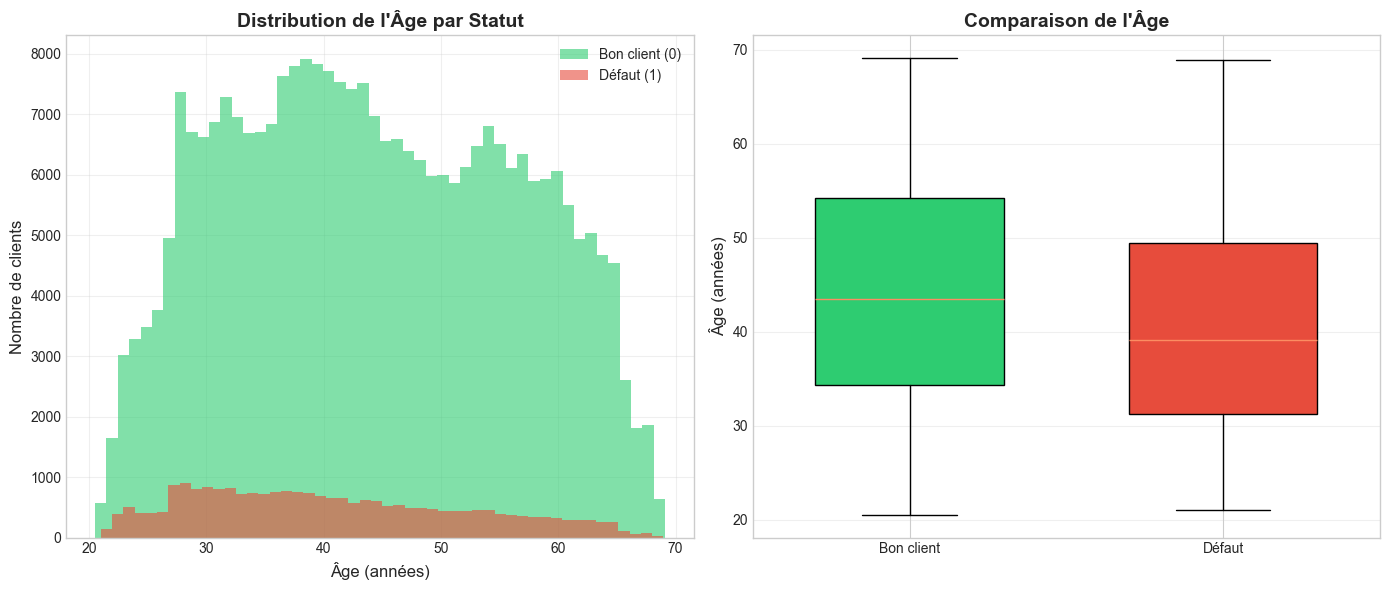

✅ Graphique 1 sauvegardé : graphique_1_age_distribution.png

📊 Création du Graphique 2 : Corrélations avec TARGET...


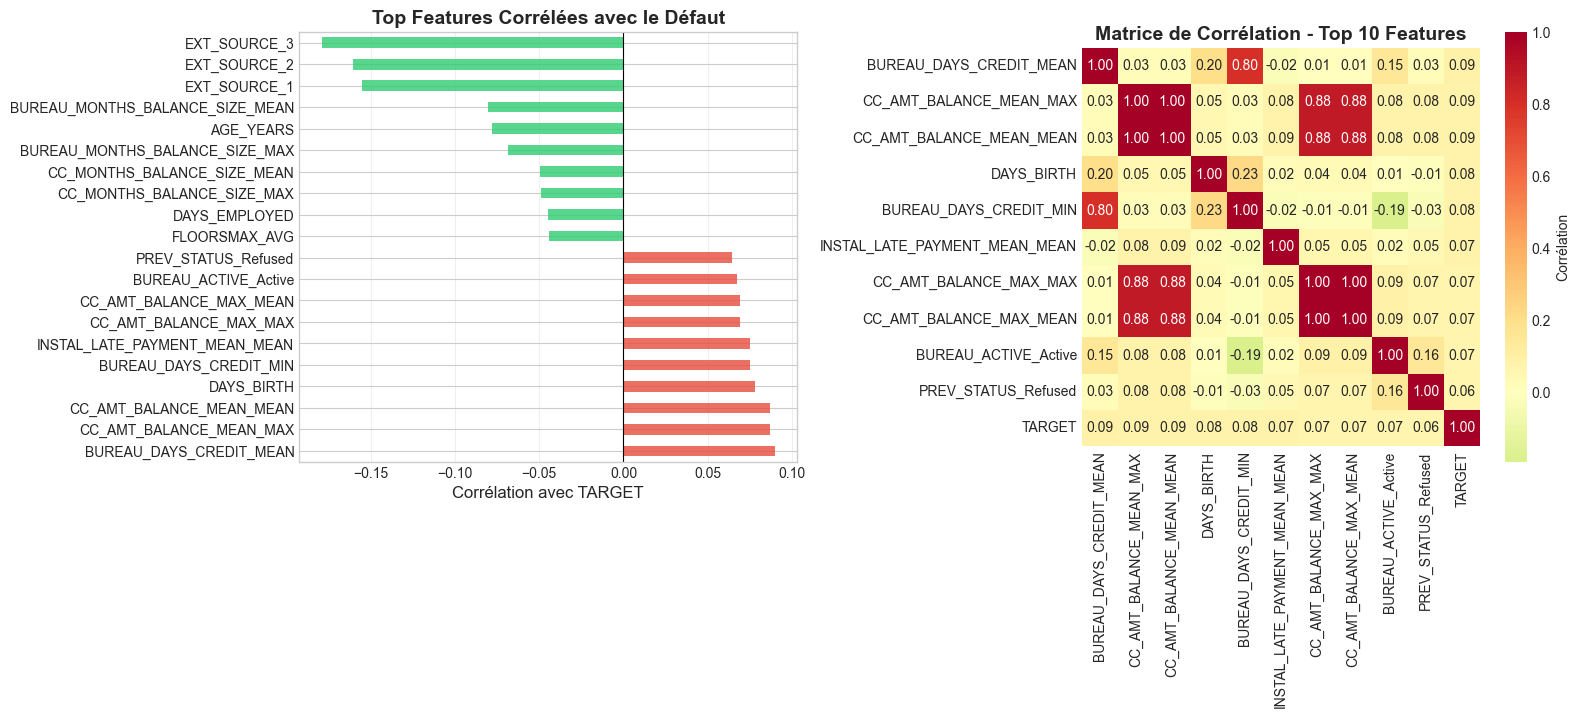

✅ Graphique 2 sauvegardé : graphique_2_correlations.png

📊 Création du Graphique 3 : Impact des Scores Externes...


/var/folders/tv/qkptv90j2yj8jtfdqg5c16_00000gn/T/ipykernel_63597/2087594037.py:138: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate = train_final.groupby(f"{source}_BIN")["TARGET"].mean() * 100
/var/folders/tv/qkptv90j2yj8jtfdqg5c16_00000gn/T/ipykernel_63597/2087594037.py:138: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate = train_final.groupby(f"{source}_BIN")["TARGET"].mean() * 100
/var/folders/tv/qkptv90j2yj8jtfdqg5c16_00000gn/T/ipykernel_63597/2087594037.py:138: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass

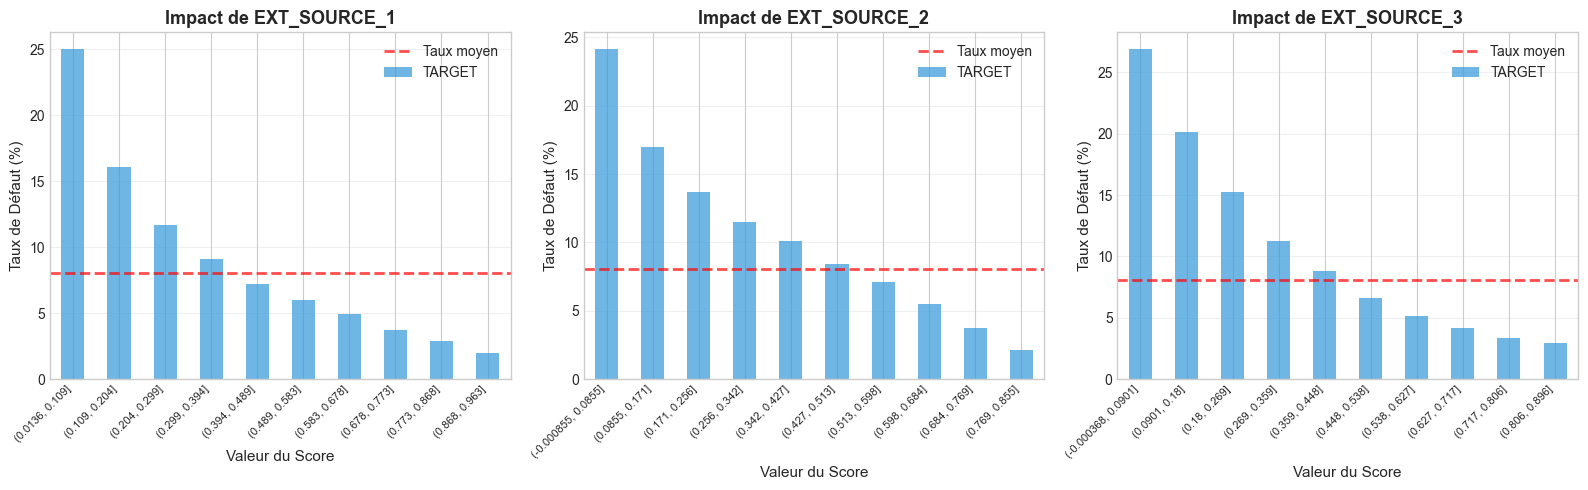

✅ Graphique 3 sauvegardé : graphique_3_ext_sources.png

📊 Création du Graphique 4 : Ratios Financiers...


/var/folders/tv/qkptv90j2yj8jtfdqg5c16_00000gn/T/ipykernel_63597/2087594037.py:183: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_by_ratio = train_final.groupby(ratio_bins)["TARGET"].agg(["mean", "count"])
/var/folders/tv/qkptv90j2yj8jtfdqg5c16_00000gn/T/ipykernel_63597/2087594037.py:221: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_by_annuity = train_final.groupby(annuity_bins)["TARGET"].agg(["mean", "count"])


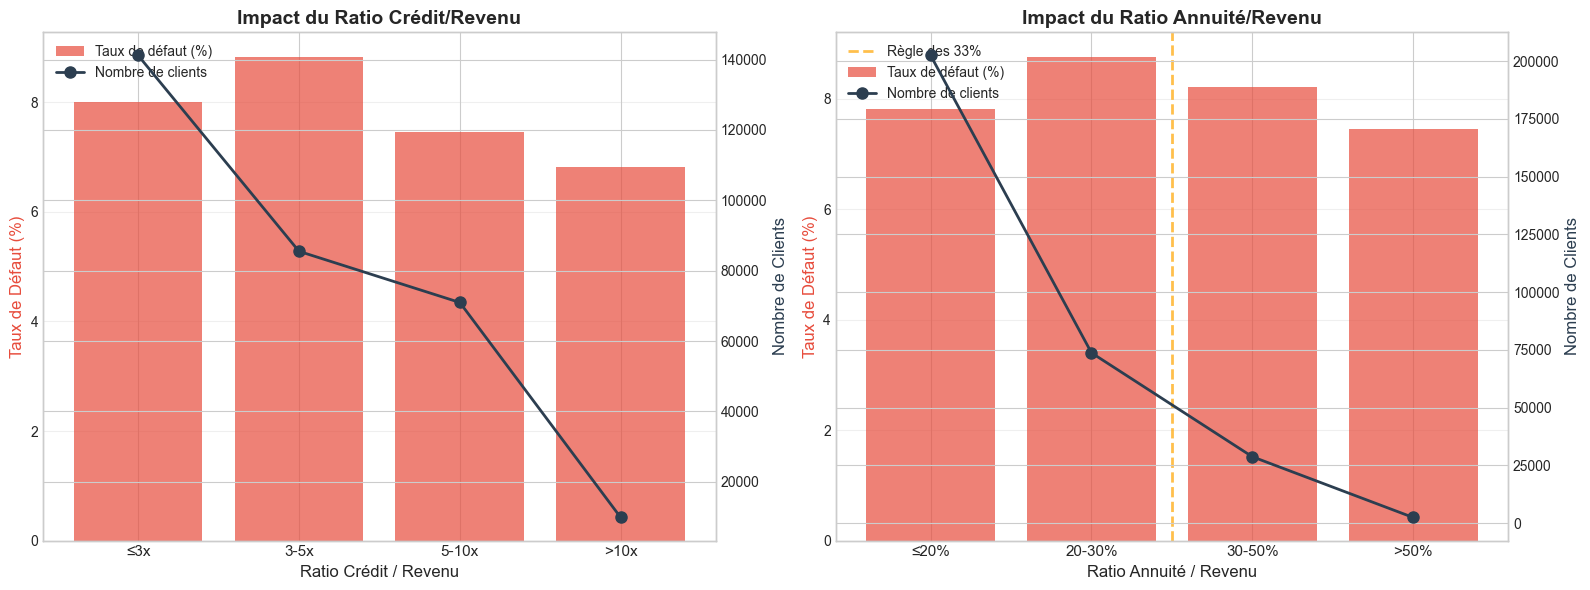

✅ Graphique 4 sauvegardé : graphique_4_ratios_financiers.png

📊 Création du Graphique 5 : Impact Historique Bureau...


/var/folders/tv/qkptv90j2yj8jtfdqg5c16_00000gn/T/ipykernel_63597/2087594037.py:326: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_by_bureau = train_final.groupby(bureau_bins)["TARGET"].agg(["mean", "count"])
/var/folders/tv/qkptv90j2yj8jtfdqg5c16_00000gn/T/ipykernel_63597/2087594037.py:359: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_by_overdue = train_final.groupby(overdue_bins)["TARGET"].agg(


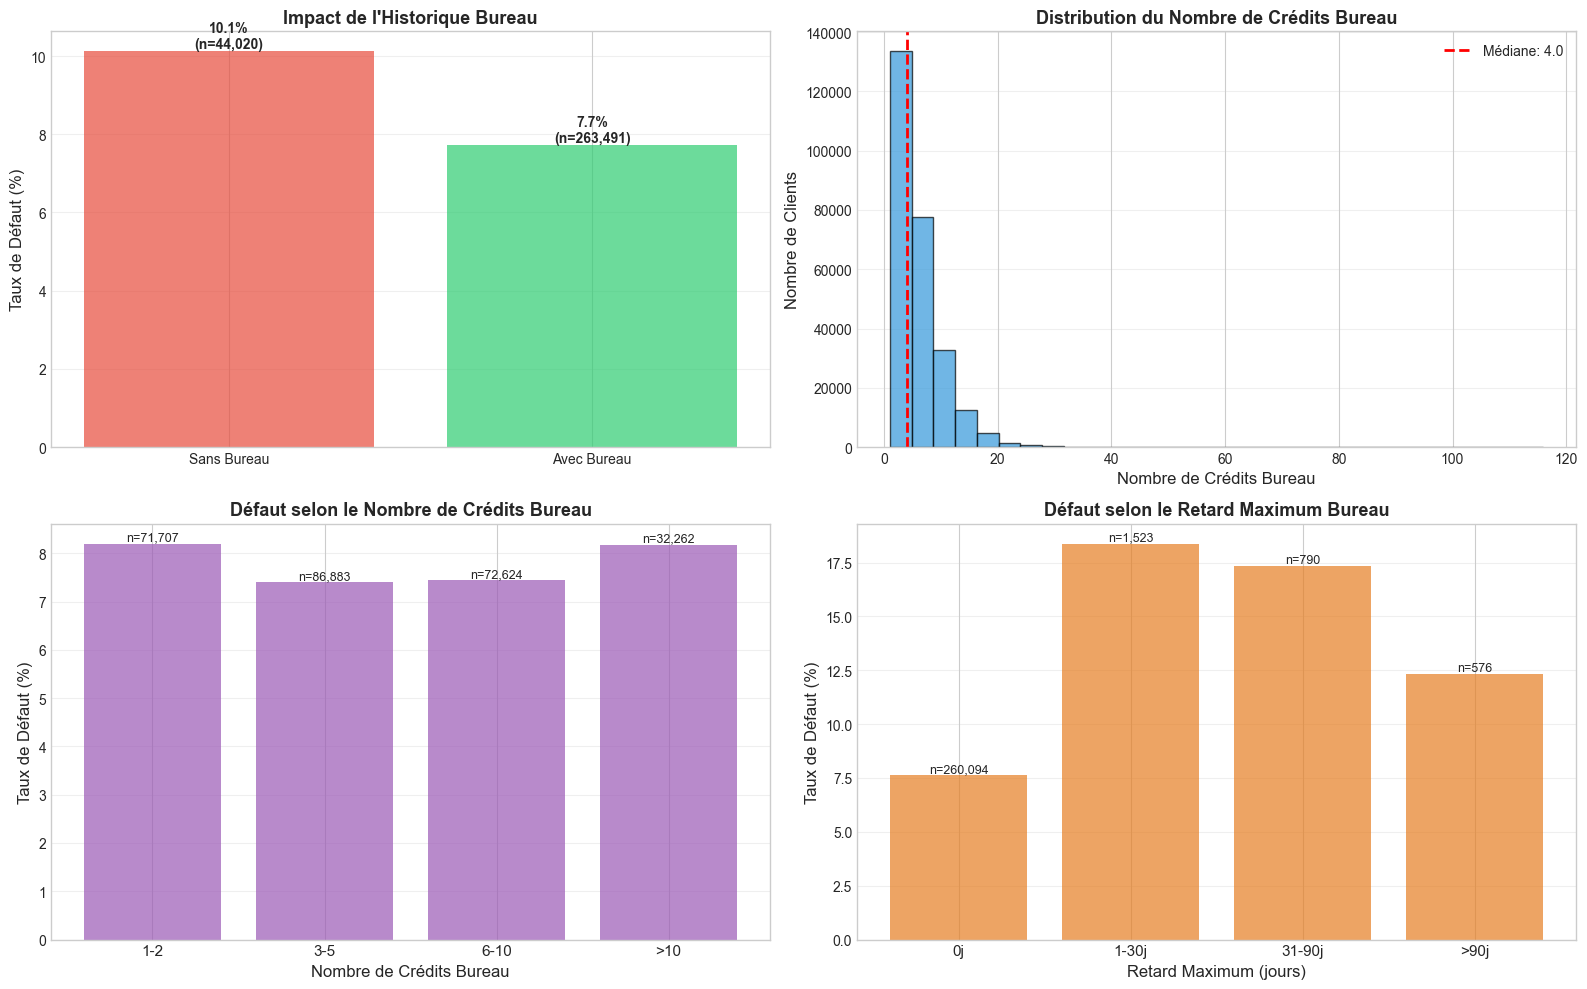

✅ Graphique 5 sauvegardé : graphique_5_historique_bureau.png


🎨 RÉSUMÉ DES 5 GRAPHIQUES CRÉÉS

📊 GRAPHIQUE 1 : Distribution de l'Âge par Statut
   - Histogram + Boxplot comparatif
   - Montre que les jeunes sont plus à risque

📊 GRAPHIQUE 2 : Top Features Corrélées avec TARGET
   - Barplot des corrélations + Heatmap
   - Identifie les features les plus prédictives

📊 GRAPHIQUE 3 : Impact des Scores Externes
   - 3 subplots montrant l'impact de chaque EXT_SOURCE
   - Relation inverse : score élevé = moins de défaut

📊 GRAPHIQUE 4 : Ratios Financiers et Risque
   - Credit/Income et Annuity/Income
   - Montre le seuil de risque (>5x crédit/revenu, >33% annuité/revenu)

📊 GRAPHIQUE 5 : Impact de l'Historique Bureau (4 analyses)
   - Présence bureau, nombre de crédits, retards
   - Vue complète de l'importance de l'historique bancaire

✅ Tous les graphiques sont sauvegardés en haute résolution (300 DPI)
✅ Prêts pour inclusion dans le rapport ou présentation



In [1]:
# ============================================================================
# 📊 5 GRAPHIQUES CLÉS POUR L'EDA - À AJOUTER À LA FIN DU NOTEBOOK 1
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Charger les données (à adapter selon ton environnement)
DATA_PATH = Path("../data")
train_final = pd.read_csv(DATA_PATH / "train_aggregated.csv")

# Configuration graphique professionnelle
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Set2")
plt.rcParams["figure.dpi"] = 100
plt.rcParams["font.size"] = 10

# ============================================================================
# GRAPHIQUE 1 : Distribution de l'Âge par Statut de Défaut
# ============================================================================
print("📊 Création du Graphique 1 : Distribution de l'Âge...")

fig1 = plt.figure(figsize=(14, 6))

# Calculer l'âge en années
train_final["AGE_YEARS"] = -train_final["DAYS_BIRTH"] / 365

# Subplot 1 : Distributions superposées
ax1 = plt.subplot(1, 2, 1)
train_final[train_final["TARGET"] == 0]["AGE_YEARS"].plot(
    kind="hist", bins=50, alpha=0.6, color="#2ecc71", label="Bon client (0)", ax=ax1
)
train_final[train_final["TARGET"] == 1]["AGE_YEARS"].plot(
    kind="hist", bins=50, alpha=0.6, color="#e74c3c", label="Défaut (1)", ax=ax1
)
ax1.set_xlabel("Âge (années)", fontsize=12)
ax1.set_ylabel("Nombre de clients", fontsize=12)
ax1.set_title("Distribution de l'Âge par Statut", fontsize=14, fontweight="bold")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Subplot 2 : Box plot comparatif
ax2 = plt.subplot(1, 2, 2)
data_to_plot = [
    train_final[train_final["TARGET"] == 0]["AGE_YEARS"].dropna(),
    train_final[train_final["TARGET"] == 1]["AGE_YEARS"].dropna(),
]
bp = ax2.boxplot(
    data_to_plot, labels=["Bon client", "Défaut"], patch_artist=True, widths=0.6
)
bp["boxes"][0].set_facecolor("#2ecc71")
bp["boxes"][1].set_facecolor("#e74c3c")
ax2.set_ylabel("Âge (années)", fontsize=12)
ax2.set_title("Comparaison de l'Âge", fontsize=14, fontweight="bold")
ax2.grid(True, alpha=0.3, axis="y")

# Stats
for i, target in enumerate([0, 1]):
    median_age = train_final[train_final["TARGET"] == target]["AGE_YEARS"].median()
    label = "Bon client" if target == 0 else "Défaut"
    print(f"  {label} - Âge médian: {median_age:.1f} ans")

plt.tight_layout()
plt.savefig("graphique_1_age_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

print("✅ Graphique 1 sauvegardé : graphique_1_age_distribution.png\n")

# ============================================================================
# GRAPHIQUE 2 : Top 15 Features Corrélées avec TARGET (Heatmap + Barplot)
# ============================================================================
print("📊 Création du Graphique 2 : Corrélations avec TARGET...")

fig2 = plt.figure(figsize=(16, 7))

# Calculer les corrélations uniquement sur colonnes numériques
numeric_cols = train_final.select_dtypes(include=[np.number]).columns.tolist()
correlations = train_final[numeric_cols].corr()["TARGET"].sort_values(ascending=False)
correlations = correlations[correlations.index != "TARGET"]

# Subplot 1 : Top 15 corrélations positives ET négatives
ax1 = plt.subplot(1, 2, 1)
top_corr = pd.concat([correlations.head(10), correlations.tail(10)])
colors = ["#e74c3c" if x > 0 else "#2ecc71" for x in top_corr.values]
top_corr.plot(kind="barh", ax=ax1, color=colors, alpha=0.8)
ax1.set_xlabel("Corrélation avec TARGET", fontsize=12)
ax1.set_title("Top Features Corrélées avec le Défaut", fontsize=14, fontweight="bold")
ax1.axvline(x=0, color="black", linestyle="-", linewidth=0.8)
ax1.grid(True, alpha=0.3, axis="x")

# Subplot 2 : Matrice de corrélation des top features entre elles
ax2 = plt.subplot(1, 2, 2)
top_features = correlations.head(10).index.tolist()
if "TARGET" not in top_features:
    top_features.append("TARGET")
corr_matrix = train_final[top_features].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdYlGn_r",
    center=0,
    square=True,
    ax=ax2,
    cbar_kws={"label": "Corrélation"},
)
ax2.set_title(
    "Matrice de Corrélation - Top 10 Features", fontsize=14, fontweight="bold"
)

plt.tight_layout()
plt.savefig("graphique_2_correlations.png", dpi=300, bbox_inches="tight")
plt.show()

print("✅ Graphique 2 sauvegardé : graphique_2_correlations.png\n")

# ============================================================================
# GRAPHIQUE 3 : Impact des Scores Externes (EXT_SOURCE) sur le Défaut
# ============================================================================
print("📊 Création du Graphique 3 : Impact des Scores Externes...")

fig3 = plt.figure(figsize=(16, 5))

ext_sources = ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]

for i, source in enumerate(ext_sources, 1):
    if source in train_final.columns:
        ax = plt.subplot(1, 3, i)

        # Créer des bins pour le score
        train_final[f"{source}_BIN"] = pd.cut(train_final[source], bins=10)

        # Calculer le taux de défaut par bin
        default_rate = train_final.groupby(f"{source}_BIN")["TARGET"].mean() * 100

        # Plot
        default_rate.plot(kind="bar", ax=ax, color="#3498db", alpha=0.7)
        ax.set_xlabel("Valeur du Score", fontsize=11)
        ax.set_ylabel("Taux de Défaut (%)", fontsize=11)
        ax.set_title(f"Impact de {source}", fontsize=13, fontweight="bold")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=8)
        ax.grid(True, alpha=0.3, axis="y")

        # Ajouter une ligne de tendance
        ax.axhline(
            y=train_final["TARGET"].mean() * 100,
            color="red",
            linestyle="--",
            linewidth=2,
            label="Taux moyen",
            alpha=0.7,
        )
        ax.legend()

plt.tight_layout()
plt.savefig("graphique_3_ext_sources.png", dpi=300, bbox_inches="tight")
plt.show()

print("✅ Graphique 3 sauvegardé : graphique_3_ext_sources.png\n")

# ============================================================================
# GRAPHIQUE 4 : Ratios Financiers et Risque de Défaut
# ============================================================================
print("📊 Création du Graphique 4 : Ratios Financiers...")

fig4 = plt.figure(figsize=(16, 6))

# Créer les ratios
train_final["CREDIT_INCOME_RATIO"] = train_final["AMT_CREDIT"] / (
    train_final["AMT_INCOME_TOTAL"] + 1
)
train_final["ANNUITY_INCOME_RATIO"] = train_final["AMT_ANNUITY"] / (
    train_final["AMT_INCOME_TOTAL"] + 1
)

# Subplot 1 : Credit/Income Ratio
ax1 = plt.subplot(1, 2, 1)
ratio_bins = pd.cut(train_final["CREDIT_INCOME_RATIO"], bins=[0, 3, 5, 10, 50])
default_by_ratio = train_final.groupby(ratio_bins)["TARGET"].agg(["mean", "count"])
default_by_ratio["mean"] *= 100

# Barplot avec deux axes
ax1_twin = ax1.twinx()
bars = ax1.bar(
    range(len(default_by_ratio)),
    default_by_ratio["mean"],
    alpha=0.7,
    color="#e74c3c",
    label="Taux de défaut (%)",
)
line = ax1_twin.plot(
    range(len(default_by_ratio)),
    default_by_ratio["count"],
    color="#2c3e50",
    marker="o",
    linewidth=2,
    markersize=8,
    label="Nombre de clients",
)

ax1.set_xlabel("Ratio Crédit / Revenu", fontsize=12)
ax1.set_ylabel("Taux de Défaut (%)", fontsize=12, color="#e74c3c")
ax1_twin.set_ylabel("Nombre de Clients", fontsize=12, color="#2c3e50")
ax1.set_title("Impact du Ratio Crédit/Revenu", fontsize=14, fontweight="bold")
ax1.set_xticks(range(len(default_by_ratio)))
ax1.set_xticklabels(["≤3x", "3-5x", "5-10x", ">10x"], fontsize=11)
ax1.grid(True, alpha=0.3, axis="y")

# Légende combinée
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

# Subplot 2 : Annuity/Income Ratio
ax2 = plt.subplot(1, 2, 2)
annuity_bins = pd.cut(train_final["ANNUITY_INCOME_RATIO"], bins=[0, 0.2, 0.3, 0.5, 1])
default_by_annuity = train_final.groupby(annuity_bins)["TARGET"].agg(["mean", "count"])
default_by_annuity["mean"] *= 100

ax2_twin = ax2.twinx()
bars = ax2.bar(
    range(len(default_by_annuity)),
    default_by_annuity["mean"],
    alpha=0.7,
    color="#e74c3c",
    label="Taux de défaut (%)",
)
line = ax2_twin.plot(
    range(len(default_by_annuity)),
    default_by_annuity["count"],
    color="#2c3e50",
    marker="o",
    linewidth=2,
    markersize=8,
    label="Nombre de clients",
)

ax2.set_xlabel("Ratio Annuité / Revenu", fontsize=12)
ax2.set_ylabel("Taux de Défaut (%)", fontsize=12, color="#e74c3c")
ax2_twin.set_ylabel("Nombre de Clients", fontsize=12, color="#2c3e50")
ax2.set_title("Impact du Ratio Annuité/Revenu", fontsize=14, fontweight="bold")
ax2.set_xticks(range(len(default_by_annuity)))
ax2.set_xticklabels(["≤20%", "20-30%", "30-50%", ">50%"], fontsize=11)
ax2.grid(True, alpha=0.3, axis="y")

# Ajouter ligne de règle des 33%
ax2.axvline(
    x=1.5, color="orange", linestyle="--", linewidth=2, alpha=0.7, label="Règle des 33%"
)

lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.tight_layout()
plt.savefig("graphique_4_ratios_financiers.png", dpi=300, bbox_inches="tight")
plt.show()

print("✅ Graphique 4 sauvegardé : graphique_4_ratios_financiers.png\n")

# ============================================================================
# GRAPHIQUE 5 : Vue d'Ensemble - Impact de l'Historique Bureau
# ============================================================================
print("📊 Création du Graphique 5 : Impact Historique Bureau...")

fig5 = plt.figure(figsize=(16, 10))

# Subplot 1 : Taux de défaut selon présence historique bureau
ax1 = plt.subplot(2, 2, 1)
has_bureau = (~train_final["BUREAU_SK_ID_BUREAU_COUNT"].isna()).astype(int)
train_final["HAS_BUREAU"] = has_bureau
bureau_stats = train_final.groupby("HAS_BUREAU")["TARGET"].agg(["mean", "count"])
bureau_stats["mean"] *= 100

bars = ax1.bar(
    ["Sans Bureau", "Avec Bureau"],
    bureau_stats["mean"],
    color=["#e74c3c", "#2ecc71"],
    alpha=0.7,
)
ax1.set_ylabel("Taux de Défaut (%)", fontsize=12)
ax1.set_title("Impact de l'Historique Bureau", fontsize=13, fontweight="bold")
ax1.grid(True, alpha=0.3, axis="y")

# Ajouter les valeurs sur les barres
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{height:.1f}%\n(n={int(bureau_stats['count'].iloc[i]):,})",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
    )

# Subplot 2 : Distribution du nombre de crédits bureau
ax2 = plt.subplot(2, 2, 2)
bureau_count = train_final[train_final["BUREAU_SK_ID_BUREAU_COUNT"].notna()][
    "BUREAU_SK_ID_BUREAU_COUNT"
]
ax2.hist(bureau_count, bins=30, color="#3498db", alpha=0.7, edgecolor="black")
ax2.set_xlabel("Nombre de Crédits Bureau", fontsize=12)
ax2.set_ylabel("Nombre de Clients", fontsize=12)
ax2.set_title(
    "Distribution du Nombre de Crédits Bureau", fontsize=13, fontweight="bold"
)
ax2.axvline(
    x=bureau_count.median(),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Médiane: {bureau_count.median():.1f}",
)
ax2.legend()
ax2.grid(True, alpha=0.3, axis="y")

# Subplot 3 : Taux de défaut selon le nombre de crédits bureau
ax3 = plt.subplot(2, 2, 3)
bureau_bins = pd.cut(train_final["BUREAU_SK_ID_BUREAU_COUNT"], bins=[0, 2, 5, 10, 50])
default_by_bureau = train_final.groupby(bureau_bins)["TARGET"].agg(["mean", "count"])
default_by_bureau["mean"] *= 100

bars = ax3.bar(
    range(len(default_by_bureau)), default_by_bureau["mean"], alpha=0.7, color="#9b59b6"
)
ax3.set_xlabel("Nombre de Crédits Bureau", fontsize=12)
ax3.set_ylabel("Taux de Défaut (%)", fontsize=12)
ax3.set_title(
    "Défaut selon le Nombre de Crédits Bureau", fontsize=13, fontweight="bold"
)
ax3.set_xticks(range(len(default_by_bureau)))
ax3.set_xticklabels(["1-2", "3-5", "6-10", ">10"], fontsize=11)
ax3.grid(True, alpha=0.3, axis="y")

# Ajouter les effectifs
for i, (bar, count) in enumerate(zip(bars, default_by_bureau["count"])):
    height = bar.get_height()
    ax3.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"n={int(count):,}",
        ha="center",
        va="bottom",
        fontsize=9,
    )

# Subplot 4 : Impact des retards bureau
ax4 = plt.subplot(2, 2, 4)
if "BUREAU_CREDIT_DAY_OVERDUE_MAX" in train_final.columns:
    overdue_bins = pd.cut(
        train_final["BUREAU_CREDIT_DAY_OVERDUE_MAX"], bins=[-1, 0, 30, 90, 1000]
    )
    default_by_overdue = train_final.groupby(overdue_bins)["TARGET"].agg(
        ["mean", "count"]
    )
    default_by_overdue["mean"] *= 100

    bars = ax4.bar(
        range(len(default_by_overdue)),
        default_by_overdue["mean"],
        alpha=0.7,
        color="#e67e22",
    )
    ax4.set_xlabel("Retard Maximum (jours)", fontsize=12)
    ax4.set_ylabel("Taux de Défaut (%)", fontsize=12)
    ax4.set_title(
        "Défaut selon le Retard Maximum Bureau", fontsize=13, fontweight="bold"
    )
    ax4.set_xticks(range(len(default_by_overdue)))
    ax4.set_xticklabels(["0j", "1-30j", "31-90j", ">90j"], fontsize=11)
    ax4.grid(True, alpha=0.3, axis="y")

    # Ajouter les effectifs
    for i, (bar, count) in enumerate(zip(bars, default_by_overdue["count"])):
        height = bar.get_height()
        ax4.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"n={int(count):,}",
            ha="center",
            va="bottom",
            fontsize=9,
        )

plt.tight_layout()
plt.savefig("graphique_5_historique_bureau.png", dpi=300, bbox_inches="tight")
plt.show()

print("✅ Graphique 5 sauvegardé : graphique_5_historique_bureau.png\n")

# ============================================================================
# RÉSUMÉ DES GRAPHIQUES CRÉÉS
# ============================================================================
print("\n" + "=" * 80)
print("🎨 RÉSUMÉ DES 5 GRAPHIQUES CRÉÉS")
print("=" * 80)
print("""
📊 GRAPHIQUE 1 : Distribution de l'Âge par Statut
   - Histogram + Boxplot comparatif
   - Montre que les jeunes sont plus à risque
   
📊 GRAPHIQUE 2 : Top Features Corrélées avec TARGET
   - Barplot des corrélations + Heatmap
   - Identifie les features les plus prédictives
   
📊 GRAPHIQUE 3 : Impact des Scores Externes
   - 3 subplots montrant l'impact de chaque EXT_SOURCE
   - Relation inverse : score élevé = moins de défaut
   
📊 GRAPHIQUE 4 : Ratios Financiers et Risque
   - Credit/Income et Annuity/Income
   - Montre le seuil de risque (>5x crédit/revenu, >33% annuité/revenu)
   
📊 GRAPHIQUE 5 : Impact de l'Historique Bureau (4 analyses)
   - Présence bureau, nombre de crédits, retards
   - Vue complète de l'importance de l'historique bancaire

✅ Tous les graphiques sont sauvegardés en haute résolution (300 DPI)
✅ Prêts pour inclusion dans le rapport ou présentation
""")
print("=" * 80)